In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
print("Done")

Done


In [10]:
df=pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
df.shape

(301, 9)

In [12]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Checking for missing values

In [13]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

No Null values 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [15]:
print("Car Fuel Types:",df.Fuel_Type.value_counts())
print("Car Selling Types:",df.Selling_type.value_counts())
print("Car Transmission Types:",df.Transmission.value_counts())
print("Car Models",df.Car_Name.value_counts())

Car Fuel Types: Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Car Selling Types: Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Car Transmission Types: Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Car Models Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64


Encoding the data


In [16]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

df

C:\Users\DELL\AppData\Local\Temp\ipykernel_7412\2955272564.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7412\2955272564.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7412\2955272564.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To r

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [18]:
x=df.drop(['Car_Name','Selling_Price'],axis=1)
y=df['Selling_Price']

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=9)
#splitting the data

In [20]:
models=[("Linear Regression",LinearRegression()),
       ("Lasso",Lasso()),("Random Forest Regressor",RandomForestRegressor())]
for name,model in models:
    model.fit(x_train,y_train)
    y_p=model.predict(x_test)
    error_score=metrics.r2_score(y_test,y_p)
    print(name,error_score)

Linear Regression 0.8767096841710843
Lasso 0.8544843863777364
Random Forest Regressor 0.9802430703334065


Random Forest Regressor seems to be the closest

lets see this in a scatter plot

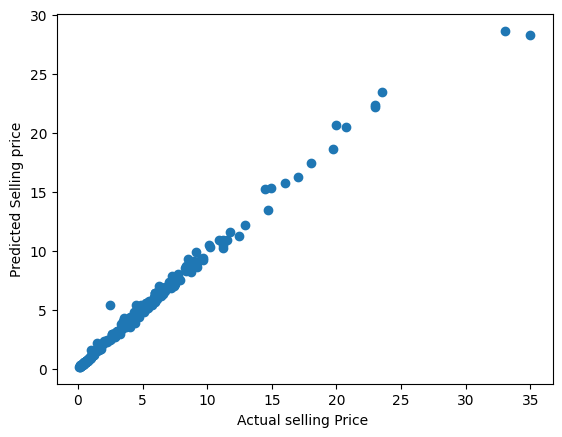

In [21]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_p=model.predict(x_train)
plt.scatter(y_train,y_p)
plt.xlabel("Actual selling Price ")
plt.ylabel("Predicted Selling price")
plt.show()

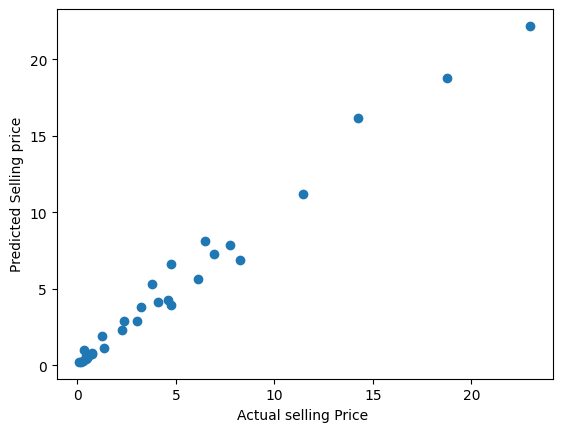

In [44]:
y_p=model.predict(x_test)
plt.scatter(y_test,y_p)
plt.xlabel("Actual selling Price ")
plt.ylabel("Predicted Selling price")
plt.show()